In [1]:
# 1 - Import necessary libraries
import os
import pandas as pd
import random
import re
import matplotlib.pyplot as plt

In [2]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files
cur_dir = os.getcwd()
files = os.listdir("CollegeScorecard_Raw_Data")
files

['.DS_Store',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [3]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name
files1=[]
list1 = os.listdir("CollegeScorecard_Raw_Data/")
for i in list1:
    if "MERGED" not in i:
        list1.remove(i)
list1[:] = [x for x in list1 if x.startswith("MERGED")==True]
list1

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [4]:
file = random.choice(list1)

In [5]:
file

'MERGED2017_18_PP.csv'

In [6]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information
df1 = pd.read_csv('CollegeScorecard_Raw_Data/'+file, usecols = ['INSTNM','TUITIONFEE_IN'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 2 columns):
INSTNM           7112 non-null object
TUITIONFEE_IN    4021 non-null float64
dtypes: float64(1), object(1)
memory usage: 111.2+ KB


In [7]:
# 5 - Find out how many observations have missing value.
df1.isna().sum()

INSTNM              0
TUITIONFEE_IN    3091
dtype: int64

In [8]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4021 entries, 0 to 7111
Data columns (total 2 columns):
INSTNM           4021 non-null object
TUITIONFEE_IN    4021 non-null float64
dtypes: float64(1), object(1)
memory usage: 94.2+ KB


In [9]:
# 7 - Find out how many observations have 0 tution.
df1.isna().sum()

INSTNM           0
TUITIONFEE_IN    0
dtype: int64

In [10]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations
mean = df1['TUITIONFEE_IN'].mean()
print(mean)

15097.328276548122


In [11]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.
df2 = df1.sample(n=1)
df2

,INSTNM,TUITIONFEE_IN
1638,Baker College,9360.0


In [12]:
val1 = df2["TUITIONFEE_IN"].values[0]

In [13]:
print(val1)

9360.0


In [14]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference
difference1 = mean - val1

In [15]:
print(difference1)

5737.328276548122


In [16]:
df3 = df1.sample(n=1)
df3

,INSTNM,TUITIONFEE_IN
6123,Grace Mission University,2840.0


In [17]:
val2 = df3["TUITIONFEE_IN"].values[0]

In [18]:
difference2 = mean - val2

In [19]:
print(difference2)

12257.328276548122


In [20]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means
for i in range(0,3):
    df4 = df1.sample(n=1)
    val3 = df4["TUITIONFEE_IN"].values[0]
    difference3 = mean - val3
    print("The difference between total mean and men of 1 observation is", difference3)
    

The difference between total mean and men of 1 observation is -22412.67172345188
The difference between total mean and men of 1 observation is 9465.328276548122
The difference between total mean and men of 1 observation is 10696.328276548122


In [21]:
# 13 - Randomly select 20 observations, display the tuition of these observation.
list1=[]
for i in range(0,20):
    df5 = df1.sample(n=20)
    val4 = df5["TUITIONFEE_IN"].values[0]
    list1.append(val4)
difference4 = mean - (sum(list1)/len(list1))
    

In [22]:
print(difference4)

1170.2782765481224


In [23]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
for i in range(0,3):
    for i in range(0,20):
        df5 = df1.sample(n=20)
        val4 = df5["TUITIONFEE_IN"].values[0]
        list1.append(val4)
    difference4 = mean - (sum(list1)/len(list1))
    print("The difference between total mean and men of 1 observation is",difference4)
    

The difference between total mean and men of 1 observation is 2429.178276548122
The difference between total mean and men of 1 observation is 2696.5282765481224
The difference between total mean and men of 1 observation is 2258.240776548122


Write a function that take two input parameters:

x (number of observations)
y (the name of the dataframe).
The function will perform the following:

Randomly select x observations from y
Calculate the mean of these x observations
Calculate the mean of all observations
Calculate the difference between the two means
Return the difference

In [24]:
def fun(x,y):
    df = y.sample(x)
    mean = df["TUITIONFEE_IN"].mean()
    sample_mean = y["TUITIONFEE_IN"].mean()
    return mean - sample_mean

In [25]:
# 18Testing the function
fun(5,df1)

2551.0717234518797

In [26]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_sizes = []

for i in range(1,51):
    sample_sizes.append(i)

In [27]:
sample_sizes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [28]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed
means_diff = []
for i in sample_sizes:
    df_sample = df1.sample(i)
    mean1 = df_sample["TUITIONFEE_IN"].mean()
    difference = mean - mean1
    means_diff.append(difference)
    

In [29]:
means_diff

[12527.328276548122,
 13972.328276548122,
 8531.661609881456,
 7498.328276548122,
 -9891.471723451878,
 -7618.338390118546,
 3223.6139908338355,
 4609.578276548122,
 -1058.893945674101,
 -237.07172345187792,
 -2193.6717234518783,
 -3015.7550567852104,
 2654.0205842404303,
 -758.8145805947352,
 3239.1949432147885,
 2655.2032765481217,
 1480.4459236069451,
 3885.3282765481217,
 3361.5388028639118,
 4147.428276548122,
 1994.9949432147878,
 2223.4646401844857,
 2555.1108852437737,
 -3510.7967234518783,
 3216.3282765481217,
 1925.4051996250455,
 -4357.042093822247,
 -7070.850294880451,
 -3462.947585520842,
 1437.461609881455,
 1328.1992442900573,
 -1243.9529734518783,
 -1076.0656628458182,
 -1138.6128999224657,
 2869.042562262408,
 -613.3661678963235,
 1671.4634116832567,
 -911.8033023992466,
 -888.748646528802,
 -1608.5217234518768,
 -3383.7448941835846,
 -1206.9812472614012,
 -465.1600955449012,
 -2262.58081436097,
 -5066.316167896324,
 698.0674069829038,
 1182.009127611951,
 4487.2032765

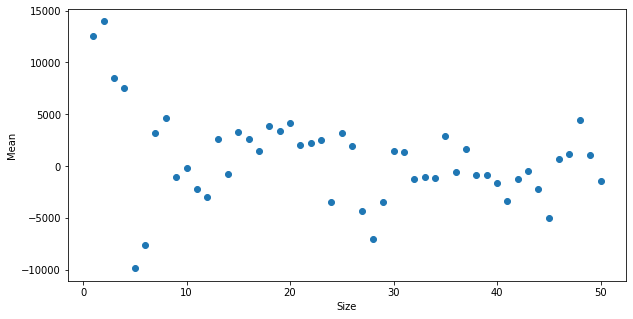

In [30]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(sample_sizes, means_diff)
ax.set(xlabel = "Size", ylabel = "Mean")
plt.show()

In [31]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
sample_sizes = []

for i in range(1,300):
    sample_sizes.append(i)

In [32]:
means_diff = []
for i in sample_sizes:
    df_sample = df1.sample(i)
    mean1 = df_sample["TUITIONFEE_IN"].mean()
    difference = mean - mean1
    means_diff.append(difference)
    

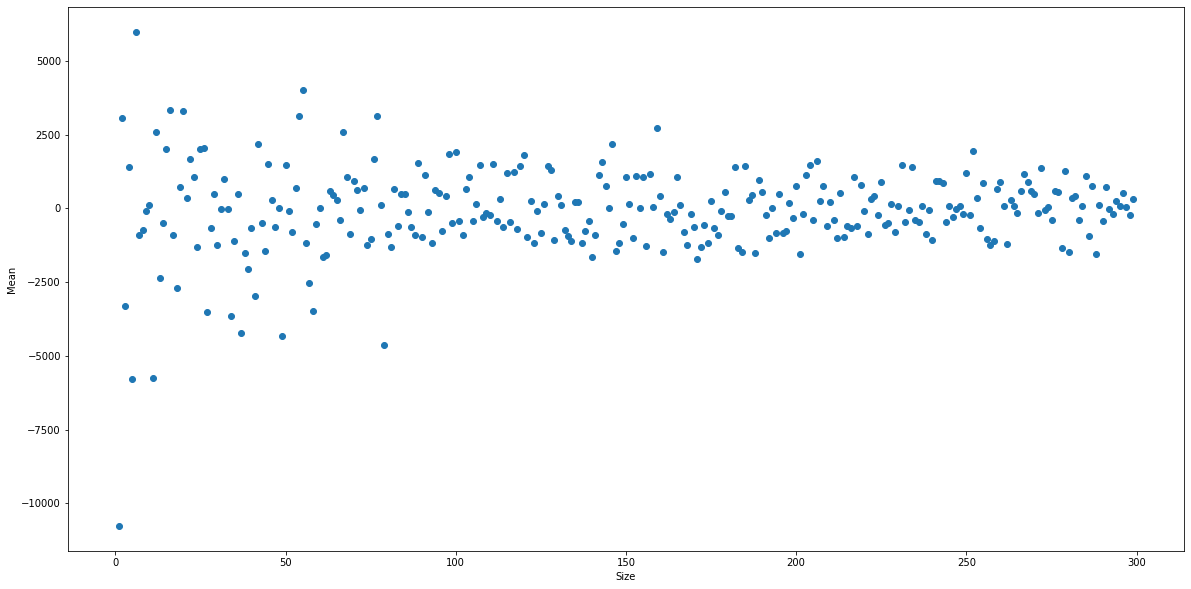

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(sample_sizes, means_diff)
ax.set(xlabel = "Size", ylabel = "Mean")
plt.show()